In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import datetime
import matplotlib.pyplot as plt


In [2]:
#Load the datasets
airlines = pd.read_csv('airlines.csv')
airports = pd.read_csv('airports.csv')
flights = pd.read_csv('flights.csv', low_memory = False)


In [3]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [4]:
#Check the missing values
flights.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

In [5]:
#Check missing values without cancelled and diverted flights
flights.loc[((flights['CANCELLED']==0)&(flights['DIVERTED']==0)),:].isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER                  0
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME               0
DEPARTURE_DELAY              0
TAXI_OUT                     0
WHEELS_OFF                   0
SCHEDULED_TIME               0
ELAPSED_TIME                 0
AIR_TIME                     0
DISTANCE                     0
WHEELS_ON                    0
TAXI_IN                      0
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME                 0
ARRIVAL_DELAY                0
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5714008
AIR_SYSTEM_DELAY       4650569
SECURITY_DELAY         4650569
AIRLINE_DELAY          4650569
LATE_AIRCRAFT_DELAY    4650569
WEATHER_DELAY          4650569
dtype: int64

In [ ]:
#Delete records with cancelled and diverted flights and after that columns with high amount of missing values >80%
#CANCELLATION_REASON','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY' >80%


In [6]:
flights_1 = flights.loc[((flights['CANCELLED']==0)&(flights['DIVERTED']==0)),:].copy()
flights_1.drop(['CANCELLED','DIVERTED','CANCELLATION_REASON','AIR_SYSTEM_DELAY'
                ,'SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY'], axis=1, inplace=True)

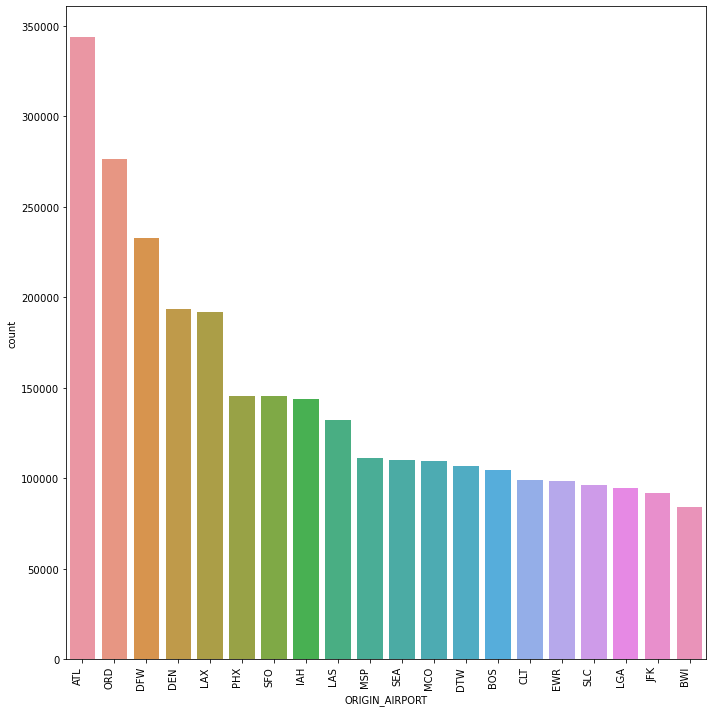

In [9]:
#Airports with amount of flights
plt.figure(figsize=(10, 10))
axis = sns.countplot(x=flights_1['ORIGIN_AIRPORT'], data = flights_1,
              order=flights_1['ORIGIN_AIRPORT'].value_counts().iloc[:20].index)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

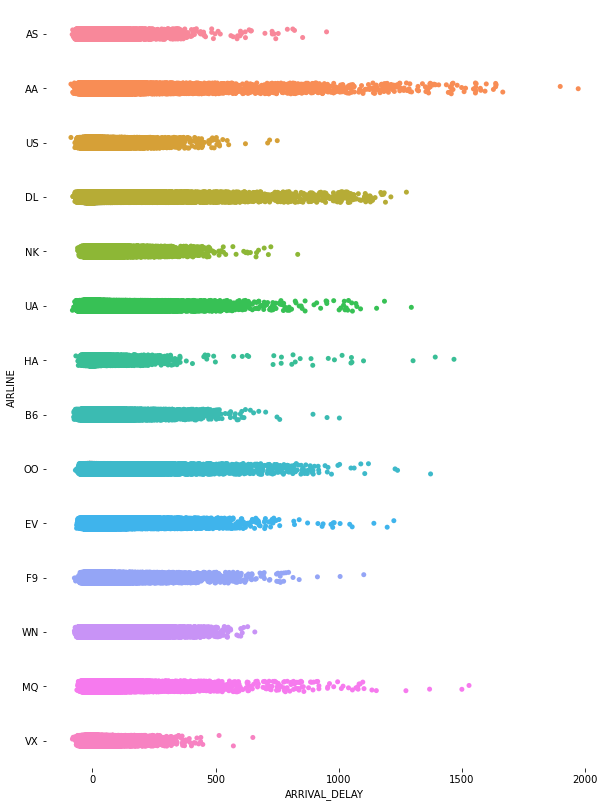

In [10]:
#Observations arrival_delay by Airline with Scatter Plot
axis = plt.subplots(figsize=(10,14))
sns.despine(bottom=True, left=True)

sns.stripplot(x="ARRIVAL_DELAY", y="AIRLINE",
              data = flights_1, dodge=True, jitter=True
            )
plt.show()

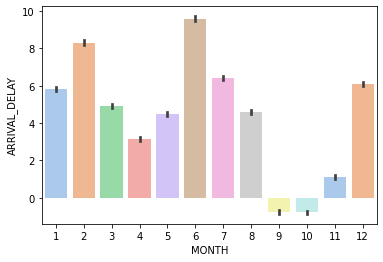

In [11]:
#Barplot represeting arrivals by monhts
sns.barplot(x="MONTH", y= "ARRIVAL_DELAY", palette="pastel", data=flights_1)

In [12]:
flights_2 = flights_1.copy()

In [13]:
flights_2.drop(['YEAR','FLIGHT_NUMBER','ORIGIN_AIRPORT','DESTINATION_AIRPORT','TAIL_NUMBER','ARRIVAL_TIME','ELAPSED_TIME','AIR_TIME','WHEELS_ON','TAXI_IN'], axis=1, inplace=True)

In [14]:
flights_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5714008 entries, 0 to 5819078
Data columns (total 13 columns):
 #   Column               Dtype  
---  ------               -----  
 0   MONTH                int64  
 1   DAY                  int64  
 2   DAY_OF_WEEK          int64  
 3   AIRLINE              object 
 4   SCHEDULED_DEPARTURE  int64  
 5   DEPARTURE_TIME       float64
 6   DEPARTURE_DELAY      float64
 7   TAXI_OUT             float64
 8   WHEELS_OFF           float64
 9   SCHEDULED_TIME       float64
 10  DISTANCE             int64  
 11  SCHEDULED_ARRIVAL    int64  
 12  ARRIVAL_DELAY        float64
dtypes: float64(6), int64(6), object(1)
memory usage: 610.3+ MB


In [ ]:
#Correlations

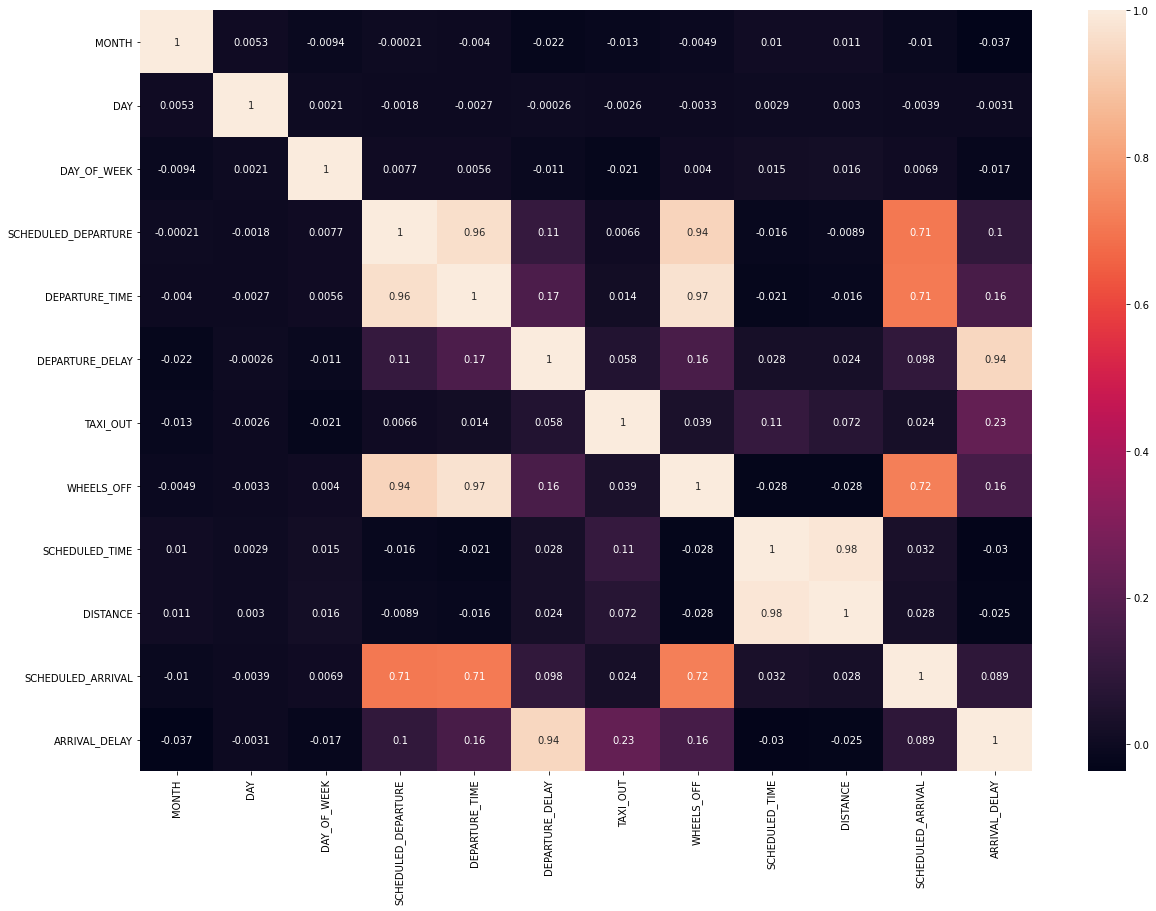

In [17]:
axis = plt.subplots(figsize=(20,14))
sns.heatmap(flights_2.corr(),annot = True)
plt.show()

In [ ]:
#Models

In [18]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV



In [19]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [20]:
y = flights_2.pop('ARRIVAL_DELAY')
X = flights_2

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=0)

In [40]:
#Linear regression with pipeline

In [22]:
numeric_features = ['MONTH', 'DAY', 'DAY_OF_WEEK', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'DISTANCE', 'SCHEDULED_ARRIVAL']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['AIRLINE']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


lin_reg = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', LinearRegression())])

lin_reg.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MONTH', 'DAY',
                                                   'DAY_OF_WEEK',
                                                   'SCHEDULED_DEPARTURE',
                                                   'DEPARTURE_TIME',
                                                   'DEPARTURE_DELAY',
                                                   'TAXI_OUT', 'WHEELS_OFF',
                                                   'SCHEDULED_TIME', 'DISTANCE',
                                                   'SCHEDULED

In [23]:
lin_reg.get_params().keys()


dict_keys(['memory', 'steps', 'verbose', 'preprocessor', 'model', 'preprocessor__n_jobs', 'preprocessor__remainder', 'preprocessor__sparse_threshold', 'preprocessor__transformer_weights', 'preprocessor__transformers', 'preprocessor__verbose', 'preprocessor__num', 'preprocessor__cat', 'preprocessor__num__memory', 'preprocessor__num__steps', 'preprocessor__num__verbose', 'preprocessor__num__imputer', 'preprocessor__num__scaler', 'preprocessor__num__imputer__add_indicator', 'preprocessor__num__imputer__copy', 'preprocessor__num__imputer__fill_value', 'preprocessor__num__imputer__missing_values', 'preprocessor__num__imputer__strategy', 'preprocessor__num__imputer__verbose', 'preprocessor__num__scaler__copy', 'preprocessor__num__scaler__with_mean', 'preprocessor__num__scaler__with_std', 'preprocessor__cat__categories', 'preprocessor__cat__drop', 'preprocessor__cat__dtype', 'preprocessor__cat__handle_unknown', 'preprocessor__cat__sparse', 'model__copy_X', 'model__fit_intercept', 'model__n_jo

In [24]:
#Using GridSearchCV to find the best params
parameters = {'model__fit_intercept':[True,False]}
grid = GridSearchCV(lin_reg,parameters, cv=3,n_jobs=-1)
grid.fit(X_train, y_train)
print ("r2 / variance : ", grid.best_score_)
print("Residual sum of squares: %.2f" % np.mean((grid.predict(X_test) - y_test) ** 2))

r2 / variance :  0.937200129947152
Residual sum of squares: 96.55


In [25]:
pred = lin_reg.predict(X_test)

In [26]:
pred_grid = grid.predict(X_test)

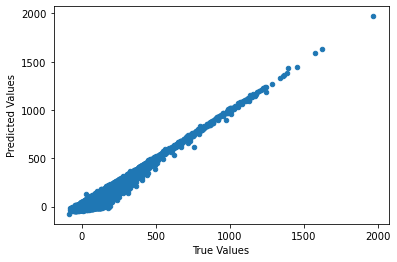

In [27]:
pd.DataFrame({'True Values': y_test, 'Predicted Values': pred_grid}).plot.scatter(x='True Values', y='Predicted Values')

In [28]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 6.937556095979794
MSE: 96.54971647407002
RMSE: 9.8259715282546
R2 Square 0.9373473668037162
__________________________________
Train set evaluation:
_____________________________________
MAE: 6.949820981976008
MSE: 96.86847218376732
RMSE: 9.84217822353199
R2 Square 0.9372017651012082
__________________________________


In [29]:
test_pred = grid.predict(X_test)
train_pred = grid.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 6.937556095979794
MSE: 96.54971647407002
RMSE: 9.8259715282546
R2 Square 0.9373473668037162
__________________________________
Train set evaluation:
_____________________________________
MAE: 6.949820981976008
MSE: 96.86847218376732
RMSE: 9.84217822353199
R2 Square 0.9372017651012082
__________________________________


In [16]:
#LASSO

In [30]:
numeric_features = ['MONTH', 'DAY', 'DAY_OF_WEEK', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'DISTANCE', 'SCHEDULED_ARRIVAL']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['AIRLINE']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
model_las = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', Lasso(alpha=0.1, precompute=True,  
                                     positive=True, selection='random',
                                     random_state=42))])


model_las.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MONTH', 'DAY',
                                                   'DAY_OF_WEEK',
                                                   'SCHEDULED_DEPARTURE',
                                                   'DEPARTURE_TIME',
                                                   'DEPARTURE_DELAY',
                                                   'TAXI_OUT', 'WHEELS_OFF',
                                                   'SCHEDULED_TIME', 'DISTANCE',
                                                   'SCHEDULED

In [31]:
model_las.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessor', 'model', 'preprocessor__n_jobs', 'preprocessor__remainder', 'preprocessor__sparse_threshold', 'preprocessor__transformer_weights', 'preprocessor__transformers', 'preprocessor__verbose', 'preprocessor__num', 'preprocessor__cat', 'preprocessor__num__memory', 'preprocessor__num__steps', 'preprocessor__num__verbose', 'preprocessor__num__imputer', 'preprocessor__num__scaler', 'preprocessor__num__imputer__add_indicator', 'preprocessor__num__imputer__copy', 'preprocessor__num__imputer__fill_value', 'preprocessor__num__imputer__missing_values', 'preprocessor__num__imputer__strategy', 'preprocessor__num__imputer__verbose', 'preprocessor__num__scaler__copy', 'preprocessor__num__scaler__with_mean', 'preprocessor__num__scaler__with_std', 'preprocessor__cat__categories', 'preprocessor__cat__drop', 'preprocessor__cat__dtype', 'preprocessor__cat__handle_unknown', 'preprocessor__cat__sparse', 'model__alpha', 'model__copy_X', 'model__fit_intercep

In [32]:
#GRIDSEARCHCV

In [33]:
parameters = {'model__alpha':[0.02, 0.024, 0.025, 0.026, 0.03]}
grid_1 = GridSearchCV(model_las,parameters, cv=3,n_jobs=-1)
grid_1.fit(X_train, y_train)
print ("r2 / variance : ", grid_1.best_score_)
print("Residual sum of squares: %.2f" % np.mean((grid_1.predict(X_test) - y_test) ** 2))

r2 / variance :  0.9273963612002764
Residual sum of squares: 111.66


In [34]:
pred_1 = model_las.predict(X_test)

In [35]:

test_pred = model_las.predict(X_test)
train_pred = model_las.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 7.808029570690837
MSE: 116.34445968195031
RMSE: 10.786308899802115
R2 Square 0.9245022458576487
__________________________________
Train set evaluation:
_____________________________________
MAE: 7.817349911393776
MSE: 116.65818097588331
RMSE: 10.800841679049059
R2 Square 0.9243724228674588
__________________________________


In [36]:
test_pred = grid_1.predict(X_test)
train_pred = grid_1.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 7.597313503954469
MSE: 111.66122446644258
RMSE: 10.566987483026683
R2 Square 0.9275412710235893
__________________________________
Train set evaluation:
_____________________________________
MAE: 7.608936894972381
MSE: 111.99160059810376
RMSE: 10.582608402379055
R2 Square 0.9273976900584386
__________________________________


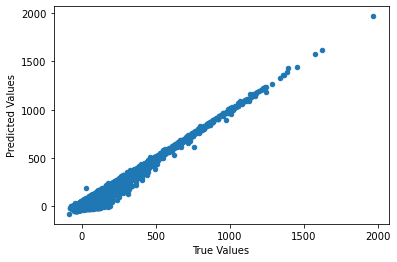

In [37]:
pd.DataFrame({'True Values': y_test, 'Predicted Values': test_pred}).plot.scatter(x='True Values', y='Predicted Values')

In [21]:
#RIDGE

In [54]:
from sklearn.linear_model import Ridge

In [57]:
numeric_features = ['MONTH', 'DAY', 'DAY_OF_WEEK', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'DISTANCE', 'SCHEDULED_ARRIVAL']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['AIRLINE']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
rid_reg = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42))])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=0)

rid_reg.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MONTH', 'DAY',
                                                   'DAY_OF_WEEK',
                                                   'SCHEDULED_DEPARTURE',
                                                   'DEPARTURE_TIME',
                                                   'DEPARTURE_DELAY',
                                                   'TAXI_OUT', 'WHEELS_OFF',
                                                   'SCHEDULED_TIME', 'DISTANCE',
                                                   'SCHEDULED

In [58]:
rid_reg.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessor', 'model', 'preprocessor__n_jobs', 'preprocessor__remainder', 'preprocessor__sparse_threshold', 'preprocessor__transformer_weights', 'preprocessor__transformers', 'preprocessor__verbose', 'preprocessor__num', 'preprocessor__cat', 'preprocessor__num__memory', 'preprocessor__num__steps', 'preprocessor__num__verbose', 'preprocessor__num__imputer', 'preprocessor__num__scaler', 'preprocessor__num__imputer__add_indicator', 'preprocessor__num__imputer__copy', 'preprocessor__num__imputer__fill_value', 'preprocessor__num__imputer__missing_values', 'preprocessor__num__imputer__strategy', 'preprocessor__num__imputer__verbose', 'preprocessor__num__scaler__copy', 'preprocessor__num__scaler__with_mean', 'preprocessor__num__scaler__with_std', 'preprocessor__cat__categories', 'preprocessor__cat__drop', 'preprocessor__cat__dtype', 'preprocessor__cat__handle_unknown', 'preprocessor__cat__sparse', 'model__alpha', 'model__copy_X', 'model__fit_intercep

In [60]:
parameters = {'model__fit_intercept':[True,False]}
grid_2 = GridSearchCV(model_las,parameters, cv=3,n_jobs=-1)
grid_2.fit(X_train, y_train)
print ("r2 / variance : ", grid_2.best_score_)
print("Residual sum of squares: %.2f" % np.mean((grid_2.predict(X_test) - y_test) ** 2))

r2 / variance :  0.9252920503139223
Residual sum of squares: 114.84


In [64]:
test_pred = grid_2.predict(X_test)
train_pred = grid_2.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 7.748014929747883
MSE: 114.84259141948286
RMSE: 10.71646356870973
R2 Square 0.9254768318512057
__________________________________
Train set evaluation:
_____________________________________
MAE: 7.7618516734126555
MSE: 115.23787052551019
RMSE: 10.734890335979692
R2 Square 0.9252931867370751
__________________________________


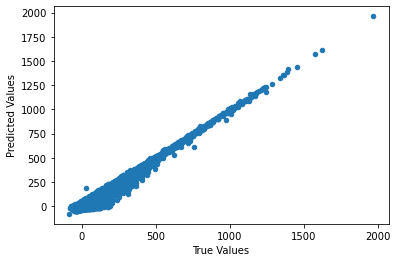

In [65]:
pd.DataFrame({'True Values': y_test, 'Predicted Values': test_pred}).plot.scatter(x='True Values', y='Predicted Values')